<a href="https://colab.research.google.com/github/HIsu1231/Hands-On-ML/blob/main/handsonml_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version은 코랩 명령입니다.
    %tensorflow_version 2.x
except Exception:
    pass

# 이 노트북은 텐서플로 ≥2.4이 필요합니다
# 2.x 버전은 대부분 동일한 결과를 만들지만 몇 가지 버그가 있습니다.
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.4"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


##텐서와 연산
###텐서

텐서는 일반적으로 다차원 배열. 하지만 스칼라 값도 가능

In [ ]:
tf.constant([[1., 2., 3.],[4., 5., 6.] ]) #행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
tf.constant(42) #스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [ ]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
t.shape

TensorShape([2, 3])

In [ ]:
t.dtype

tf.float32

###인덱싱

In [ ]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [ ]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [ ]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

###연산

In [ ]:
t + 10  #tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [ ]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
t @ tf.transpose(t)  # @ = tf.matmul

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [ ]:
tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

###keras.backend 사용하기

In [ ]:
from tensorflow import keras

K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

###넘파이 변환

In [ ]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [ ]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [ ]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

###타입 변환

In [ ]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [ ]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [ ]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

###문자열

In [ ]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [ ]:
tf.constant('cafe')

<tf.Tensor: shape=(), dtype=string, numpy=b'cafe'>

In [ ]:
u = tf.constant([ord(c) for c in 'cafe'])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

In [ ]:
b = tf.strings.unicode_encode(u, 'UTF-8')
tf.strings.length(b, unit='UTF8_CHAR')

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
tf.strings.unicode_decode(b, 'UTF-8')

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

###문자열 배열

In [ ]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [ ]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [ ]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [ ]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


###레그드 텐서

리스트의 리스트를 나타냄.


In [ ]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [ ]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [ ]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [ ]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [ ]:
tf.strings.unicode_encode(r3, 'UTF-8')

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [ ]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

###희소 텐서

대부분 0으로 채워진 텐서를 효율적으로 나타냄

In [ ]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.,], 
                    dense_shape=[3, 4])

In [ ]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [ ]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [ ]:
s2 = s * 2.0

In [ ]:
try:
  s3 = s + 1
except TypeError as ex:
  print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [ ]:
type(s)

tensorflow.python.framework.sparse_tensor.SparseTensor

In [ ]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [ ]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [ ]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [ ]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

###집합

In [ ]:
set1 = tf.constant([[2, 3, 5, 7],[7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [ ]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [ ]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

###변수

In [ ]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [ ]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [ ]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [ ]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])  #특정값 변경

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [ ]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.,]], indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

###텐서 배열

In [ ]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [ ]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [ ]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [ ]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [ ]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

##사용자 정의 손실 함수

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

훈련 세트에 잡음 데이터가 있을 경우 평균 제곱 오차보다 후버 손실 함수를 쓰는 것이 바람직

In [ ]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

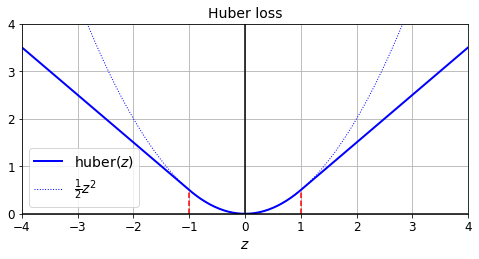

In [ ]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [ ]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


###사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [ ]:
model.save('my_model_with_a_custom_loss.h5')

In [ ]:
model = keras.models.load_model('my_model_with_a_custom_loss.h5',
                                custom_objects={'huber_fn': huber_fn})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2054 - mae: 0.4982 - val_loss: 0.2209 - val_mae: 0.5050
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1999 - mae: 0.4900 - val_loss: 0.2127 - val_mae: 0.4986


기존 손실 함수에 다른 기준을 추가하고 싶다면 매개변수를 받을 수 있는 함수를 만든다

In [ ]:
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [ ]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=['mae'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2226 - mae: 0.4892 - val_loss: 0.2540 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2184 - mae: 0.4844 - val_loss: 0.2372 - val_mae: 0.4879


In [ ]:
model.save('my_model_with_a_custom_loss_threshold_2.h5')

모델을 저장할때 임곗값이 함께 저장되지 않음. 모델 로드할 때 임곗값 지정해야함




In [ ]:
model = keras.models.load_model('my_model_with_a_custom_loss_threshold_2.h5',
                                custom_objects={'huber_fn': create_huber(2.0)})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2147 - mae: 0.4800 - val_loss: 0.2133 - val_mae: 0.4654
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2119 - mae: 0.4762 - val_loss: 0.1992 - val_mae: 0.4643


keras.losses.Loss 클래스를 상속하고 get_config() 메서드를 구현하여 해결 가능

In [ ]:
class HuberLoss(keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs):
    self.threshold=threshold
    super().__init__(**kwargs)

  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)

  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold':self.threshold}

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=HuberLoss(2.), optimizer='nadam', metrics=['mae'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7095 - mae: 0.8863 - val_loss: 0.3378 - val_mae: 0.5485
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2416 - mae: 0.5083 - val_loss: 0.2660 - val_mae: 0.5089


In [ ]:
model.save('my_model_with_a_custom_loss_class.h5')

In [ ]:
model = keras.models.load_model('my_model_with_a_custom_loss_class.h5',
                                custom_objects={'HuberLoss': HuberLoss})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2286 - mae: 0.4970 - val_loss: 0.2120 - val_mae: 0.4723
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2216 - mae: 0.4904 - val_loss: 0.2045 - val_mae: 0.4725


In [ ]:
model.loss.threshold

2.0

###그외 사용자 정의 함수

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def my_softplus(z):  #t사용자 정의 활성화 함수(keras.activations.softplus()나 tf.nn.softplus())와 동일
  return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):   #사용자 정의 글로럿 초기화(keras.initializers.glorot_normal())과 동일
  stddev = tf.sqrt(2. / (shape[0] + shape[1]))
  return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights): #사용ㅈ 정의 l1규제(keras.regularizers.l1(0.01))과 동일
  return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): #양수인 가중치만 남기는 사용자 정의 제한(keras.constraints.nonneg()나 tf.nn.relu())와 동일
  return tf.where(weights < 0., tf.zeros_like(weights), weights)

만들어진 사용자 정의 함수는 보통의 함수와 동일하게 사용

In [ ]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [ ]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [ ]:
model.save('my_model_with_many_custom_parts.h5')

In [ ]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

모델과 함께 저장해야 할 하이퍼파라미터를 가지고 있다면 keras.regularizers.Regularizer, keras.contraints.Contraint, keras.initializers.Initializer, keras.layers.Layer와 같이 적절한 클래스 상속

In [ ]:
class MyL1Regularizer(keras.regularizers.Regularizer):
  def __init__(self, factor):
    self.factor = factor
  
  def __call__(self, weights):
    return tf.reduce_sum(tf.abs(self.factor * weights))
  
  def get_config(self):
    return {'factor': self.factor}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
    
])

In [ ]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [ ]:
model.save('my_model_with_many_custom_parts.h5')

In [ ]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

##사용자 정의 지표

대부분의 경우 사용자 지표 함수를 만드는 것은 사용자 손실 함수를 만드는 것과 동일. 

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

앞에서 만든 후버 손실 함수를 지표로 사용해도 잘 동작함

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(loss='mse', optimizer='nadam', metrics=[create_huber(2.0)])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.0982 - huber_fn: 0.9192
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6052 - huber_fn: 0.2733


In [ ]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=[create_huber(2.0)])

In [ ]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1175 - huber_fn: 0.2399
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1131 - huber_fn: 0.2297


In [ ]:
history.history['loss'][0], history.history['huber_fn'][0] * sample_weight.mean()

(0.11749906837940216, 0.11906625573138947)

###스트리밍 지표

keras.metrics.Precision: 진짜 양성 개수와 거짓 양성 개수를 기록하고 필요할 때 정밀도를 계산할 수 있는 객체

In [ ]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1]) #첫번째 배치의 레이블과 예측

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [ ]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0]) #두번째 배치의 레이블과 예측

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [ ]:
precision.result() #현재 지푯값 반환

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [ ]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [ ]:
precision.reset_states()

스트리밍 지표 만들기

In [ ]:
class HuberMetric(keras.metrics.Metric):
  def __init__(self, threshold=1.0, **kwargs):
    super().__init__(**kwargs)
    self.threshold = threshold
    self.huber_fn = create_huber(threshold)
    self.total = self.add_weight('total', initializer='zeros')
    self.count = self.add_weight('count', initializer='zeros')
  
  def update_state(self, y_true, y_pred, sample_weight=None):
    metric = self.huber_fn(y_true, y_pred)
    self.total.assign_add(tf.reduce_sum(metric))
    self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

  def result(self):
    return self.total / self.count
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold}

In [ ]:
m = HuberMetric(2.)

m(tf.constant([[2.]]), tf.constant([[10.]]))

#....잘... 모르겠네....

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

HuberMetric이 잘 작동하느지 확인

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1),
])


In [ ]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=[HuberMetric(2.0)])

In [ ]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.8707 - huber_metric: 0.8707
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2595 - huber_metric: 0.2595


In [ ]:
model.save('my_model_with_a_custom_metric.h5')

In [ ]:
model = keras.models.load_model('my_model_with_a_custom_metric.h5',
                                custom_objects={'huber_fn':create_huber(2.0),
                                                "HuberMetric": HuberMetric})

In [ ]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2350 - huber_metric: 0.2350
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2278 - huber_metric: 0.2278


In [ ]:
model.metrics[-1].threshold

2.0

크기를 잘 처리하고 샘플 가중치 지원하는 더 간단한 클래스 생성

In [ ]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [ ]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4455 - HuberMetric: 0.8978
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1305 - HuberMetric: 0.2631


In [ ]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.44554394483566284, 0.44554404180100277)

In [ ]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",
                                custom_objects={"HuberMetric": HuberMetric})

In [ ]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2377 - HuberMetric: 0.2377
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2279 - HuberMetric: 0.2279


In [ ]:
model.metrics[-1].threshold

2.0

###사용자 정의 층

텐서플로에는 없는 특이한 층을 가진 네트워크를 만들어야 할 때 사용자 정의 층 만듦

가중치가 필요 없는 사용자 정의 층을 만들기 위한 가장 간단한 방법은 파이썬 함수를 만든 후 keras.layers.Lambda 층으로 감싸는 것

In [ ]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [ ]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0631 - val_loss: 0.4457
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4562 - val_loss: 0.3798
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4029 - val_loss: 0.3548
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.3851 - val_loss: 0.3464
Epoch 5/5
162/162 [==============================] - 0s 883us/step - loss: 0.3586


0.3586341142654419

가중치를 가진 층을 만들려면 keras.layers.Layer를 상속해야함

In [ ]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [ ]:
model.compile(loss='mse', optimizer='nadam')
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 880us/step - loss: 0.5474


0.5473727583885193

In [ ]:
model.save('my_model_with_a_custom_layer.h5')

In [ ]:
model = keras.models.load_model('my_model_with_a_custom_layer.h5',
                                custom_objects={'MyDense': MyDense})

여러 가지 입력을 맏는 층을 만들려면 call() 메서드에 모든 입력이 포함된 튜플을 매개변수 값으로 전달해야 함

In [ ]:
class MyMultiLayer(keras.layers.Layer):
  def call(self, X):
    X1, X2 = X
    print('X1.shape: ', X1.shape, "X2.shape:", X2.shape)
    return X1 + X2, X1 * X2

  def compute_output_shape(self, batch_input_shape):
    batch_input_shape1, batch_input_shape2 = batch_input_shape
    return [batch_input_shape1, batch_input_shape2]

In [ ]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2) X2.shape: (None, 2)


사용자 층에 실제 데이터 전달하기

각 데이터셋의 입력을 각각 네개의 특성을 가진 두 부분으로 나누기

In [ ]:
def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

In [ ]:
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4) X2.shape: (11610, 4)


함수형 API를 사용해 완전한 모델 만들기

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

X1.shape:  (None, 4) X2.shape: (None, 4)


In [ ]:
model.compile(loss='mse', optimizer='nadam')

In [ ]:
model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=2,
          validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid))

Epoch 1/2
X1.shape:  (None, 4) X2.shape: (None, 4)
X1.shape:  (None, 4) X2.shape: (None, 4)
363/363 [==============================] - 1s 2ms/step - loss: 2.1142 - val_loss: 1.3630
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.9684 - val_loss: 0.9773


훈련과 테스트에서 다르게 동작하는 층 만들기
-> call() 메서드에 training 매개변수를 추가하여 훈련인지 테스트인지 결정해야함

In [ ]:
class AddGaussianNoise(keras.layers.Layer):
  def __init__(self, stddev, **kwargs):
    super().__init__(**kwargs)
    self.stddev = stddev
  
  def call(self, X, training=None):
    if training:
      noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
      return X + noise
    
    else:
      return X
    
  def compute_output_shape(self, batch_input_shape):
    return batch_input_shape

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.3857 - val_loss: 7.6082
Epoch 2/2
162/162 [==============================] - 0s 990us/step - loss: 0.7560


0.7559615969657898

##사용자 정의 모델

In [ ]:
X_new_scaled = X_test_scaled

In [ ]:
class ResidualBlock(keras.layers.Layer):
  def __init__(self, n_layers, n_neurons, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(n_neurons, activation='elu',
                                      kernel_initializer='he_normal')
                  for _ in range(n_layers)]

  def call(self, inputs):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
      return inputs + Z

모델 정의

In [ ]:
class ResidualRegressor(keras.models.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(30, activation='elu',
                                      kernel_initializer='he_normal')
    self.block1 = ResidualBlock(2, 30)
    self.block2 = ResidualBlock(2, 30)
    self.out = keras.layers.Dense(output_dim)


  def call(self, inputs):
    Z = self.hidden1(inputs)
    for _ in range(1 + 3):
      Z = self.block1(Z)
    Z = self.block2(Z)
    return self.out(Z)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
model = ResidualRegressor(1)
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 2s 2ms/step - loss: 16.8437
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.3241
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.9051
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.8496
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 3.4955


In [ ]:
model.save('my_custom_model.ckpt')

INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


In [ ]:
model = keras.models.load_model('my_custom_model.ckpt')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.1135
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.2377
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6694
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4999
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4145


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.3756
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5827
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4849
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4010
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4782


##모델 구성 요소에 기반한 손실과 지표

레이블과 예측 기반 손실과 지표가 아닌 은닉층의 가중치나 활성화 함수 등과 같이 모델의 구성 요소에 기반한 손실을 정의해야 할 때가 있음


재구성 손실: 보조 출력에 연결된 손실

In [ ]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruct = keras.layers.Dense(8) 
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        self.recon_loss = 0.05 * tf.reduce_mean(tf.square(reconstruction - inputs))
        
        if training:
           result = self.reconstruction_mean(recon_loss)
           self.add_metric(result)
        return self.out(Z)
    
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x)
            loss = self.compiled_loss(y, y_pred, regularization_losses=[self.recon_loss])

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        return {m.name: m.result() for m in self.metrics}

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.7885 - reconstruction_error: 0.0000e+00
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4126 - reconstruction_error: 0.0000e+00


##자동 미분을 사용하여 그레이디언트 계산하기

In [ ]:
def f(w1, w2):
  return 3 * w1 ** 2 + 2 * w1 * w2

신경망은 보통 수만 개의 파라미터를 가진 매우 복잡한 함수. 손으로 직접 도함수 계산 불가.

각 파라미터가 바뀔 때마다 함수의 출력이 얼마나 변하는지 측정하여 도함수의 근삿값 계산

In [ ]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [ ]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

위 방법은 파라미터마다 적어도 한번씩 함수 f() 호출해야해서 대규모 신경망에서는 적용하기 어려움

대신 자동 미분 사용

In [ ]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
  z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2]) #두 변수[w1, w2]에 대한 z의 그레이디언트 요청

In [ ]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

gradient()메서드가 호출되면 자동으로 테이프가 즉시 지워짐. 두번 호출하면 예외 발생/

In [ ]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)

RuntimeError: ignored

gradient() 메서드를 한번 이상 호출해야 한다면 지속 ㅈ가능한 테이프를 만들고 사용이 끝난 후 테이프를 삭제하여 리소스 해제

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

In [ ]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

기본적으로 테이프는 변수가 포함된 연산만을 기록. 만약 변수가 아닌 다른 객체에 대한 z의 그레이디언트를 계산하려면 None 반환

In [ ]:
c1, c2 = tf.constant(5.), tf.constant(3.)

with tf.GradientTape() as tape:
  z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [ ]:
gradients

[None, None]

In [ ]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [ ]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

위 두개는 뭘 말하고 싶은걸까..

대부분의 경우 그레이디언트 테이프는 여러값에 대한 한 값의 그레이디언트를 계산하는데 사용. 만약 개별 그레이디언트를 계산하고 싶다면 테이프의 jacobian()메서드를 호출

In [ ]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [ ]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [ ]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

어떤 경우에는 신경망의 일부분에 그레이디언트가 역전파되지 않도록 막을 필요가 있음. tf.stop_gradient()사용

In [ ]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

그레이디언트 계산할 때 수치적인 이슈 발생 가능. 예를 들어 큰 입력에 대한 my_softplus()함수의 그레이디언트 계산하면 NaN 반환


In [ ]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

자동 미분을 사용하여 이 함수의 그레이디언트를 계산하는 것이 수치적으로 불안정하기 때문

In [ ]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [ ]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [ ]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

###사용자 정의 훈련 반복

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

간단한 모델 생성

In [ ]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

훈련 세트에서 샘플 배치를 랜덤하게 추출하는 작은 함수 생성

In [ ]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

현재 스텝 수, 전체 스텝 횟수, 에포크 시작부터 평균 손실 등의 훈련 상태 출력하는 함수 생성

In [ ]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()


Epoch 1/5
11610/11610 - mean: 0.6500 - mean_absolute_error: 0.5223
Epoch 2/5
11610/11610 - mean: 0.6297 - mean_absolute_error: 0.5119
Epoch 3/5
11610/11610 - mean: 0.6258 - mean_absolute_error: 0.5096
Epoch 4/5
11610/11610 - mean: 0.6122 - mean_absolute_error: 0.5052
Epoch 5/5
11610/11610 - mean: 0.6373 - mean_absolute_error: 0.5134


###텐서플로 함수

In [ ]:
def cube(x):
  return x ** 3

In [ ]:
cube(2)

8

In [ ]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
tf_cube = tf.function(cube)
tf_cube

In [ ]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
import tensorflow as tf

BATCH_SIZE = 4
x = np.array([[1],[2],[3],[4]])
# make a dataset from a numpy array
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(BATCH_SIZE)
iter = dataset.make_one_shot_iterator()
el = iter.get_next()
with tf.Session() as sess:
  print(sess.run(el))

[[1]
 [2]
 [4]
 [3]]


In [ ]:
# MAP
x = np.array([[1],[2],[3],[4]])
# make a dataset from a numpy array
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset = dataset.map(lambda x: x*2)
iter = dataset.make_one_shot_iterator()
el = iter.get_next()
with tf.Session() as sess:
#     this will run forever
        for _ in range(len(x)):
            print(sess.run(el))

AttributeError: ignored

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
'''iter = ds.make_one_shot_iterator()
el = iter.get_next()
with tf.Session() as sess:
#     this will run forever
       # for _ in range(len(x)):
        #    print(sess.run(el))
      
      print(sess.run(el))'''

In [ ]:
def con_cat(a,b):
  return a+b


con_cat([1,2,3],[4,5,6])

[1, 2, 3, 4, 5, 6]

In [ ]:
a = map(lambda x,y: concat([x,y], axis=1), ([1,2,3], [4,5,6]))
print(a)

In [ ]:
a

In [ ]:
ds = ds.map(con_cat([1,2,3],[4,5,6]))
ds = tf.data.Dataset.from_tensor_slices(ds)

ValueError: ignored

In [ ]:
s1 = [[0,0],[0,1],[1,0],[1,1]]
s2 = [[0], [1], [1], [0]]





iter = ds.make_one_shot_iterator()

el = iter.get_next()
with tf.Session() as sess:
#     this will run forever
        for _ in range(len(x)):
            print(sess.run(el))
      
  

ValueError: ignored

In [ ]:
import tensorflow as tf
map(lambda x: tf.concat(x, axis=1), range(5))


In [ ]:
tf.shape(s2)

<tf.Tensor 'Shape_4:0' shape=(2,) dtype=int32>

In [ ]:
d = tf.concat([s1, s2], axis=1)

In [ ]:
iter = dataset.make_one_shot_iterator()
el = iter.get_next()
with tf.Session() as sess:
#     this will run forever
        for _ in range(len(x)):
            print(sess.run(el))

[2]
[4]
[6]
[8]


In [ ]:
s1 = [[0,0],[0,1],[1,0],[1,1]]
s2 = [0, 1, 1, 0]

ds = tf.data.Dataset.from_tensor_slices((s1, s2))

iter = ds.make_one_shot_iterator()

el = iter.get_next()
with tf.Session() as sess:
#     this will run forever
        for _ in range(len(x)):
            print(sess.run(el))

AttributeError: ignored